In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x_all = pd.read_csv('heart_disease_uci.csv', index_col = 0 )
x_all
#loading the dataset, setting index_col = 0 in order to avoid double indexing

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2


In [3]:
x = x_all[x_all['dataset'] == 'Cleveland']
#creating a new dataframe that consists only of Cleveland data

In [4]:
x
#checking if the new dataframe has been properly created

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,68,Male,Cleveland,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,2
301,57,Male,Cleveland,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect,3
302,57,Female,Cleveland,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,flat,1.0,normal,1


In [5]:
x.describe()
#printing the descriptuve stats for all columns
#in this table we can see that there are possible outliers in the chol and oldpeak columns

,age,trestbps,chol,thalch,oldpeak,ca,num
count,304.000000,304.000000,304.000000,304.000000,304.000000,299.000000,304.000000
mean,54.351974,131.684211,246.315789,149.723684,1.036184,0.672241,0.934211
std,9.150256,17.570949,52.108280,22.927263,1.160690,0.937438,1.227684
min,28.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.750000,120.000000,211.000000,133.750000,0.000000,0.000000,0.000000
50%,55.500000,130.000000,240.500000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
x.shape
#checking the number of rows and columns 

(304, 15)

In [7]:
x.info()
#checking the datatype for every column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 1 to 304
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       304 non-null    int64  
 1   sex       304 non-null    object 
 2   dataset   304 non-null    object 
 3   cp        304 non-null    object 
 4   trestbps  304 non-null    float64
 5   chol      304 non-null    float64
 6   fbs       304 non-null    object 
 7   restecg   304 non-null    object 
 8   thalch    304 non-null    float64
 9   exang     304 non-null    object 
 10  oldpeak   304 non-null    float64
 11  slope     303 non-null    object 
 12  ca        299 non-null    float64
 13  thal      301 non-null    object 
 14  num       304 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 38.0+ KB


In [8]:
x.isna().sum()
#checking for possible missing values for all columns

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       1
ca          5
thal        3
num         0
dtype: int64

In [26]:
#replacing the missing values for ca with the median
x.loc[x.ca.isna(),'ca'] = x.loc[:,'ca'].median() 
x.loc[x.WklyStudyHours.isna(),'WklyStudyHours'] = x.loc[:,'WklyStudyHours'].mode()

In [27]:
x.isna().sum()
#checking if the missing values have been replaced

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       1
ca          0
thal        3
num         0
dtype: int64

In [11]:
print('chol > 400: ', (x.chol > 400).sum())
print('oldpeak > 4: ', (x.oldpeak > 4).sum())
#looking for the number of possible outliers for chol and oldpeak columns

chol > 400:  4
oldpeak > 4:  5


In [12]:
chol_outliers = x['chol'] > 400
x.loc[chol_outliers, 'chol'] = x['chol'].median()
#replacing the outliers for chol column with the median
oldpeak_outliers = x['oldpeak'] > 4
x.loc[oldpeak_outliers, 'oldpeak'] = x['oldpeak'].median()
#replacing the outliers for oldpeak column with the median

In [13]:
print('chol > 400: ', (x.chol > 400).sum())
print('oldpeak > 4: ', (x.oldpeak > 4).sum())
#checking if the outliers have been replaced 

chol > 400:  0
oldpeak > 4:  0


In [14]:
x.nunique()
#checking the number of unique values for all columns

age          42
sex           2
dataset       1
cp            4
trestbps     50
chol        150
fbs           2
restecg       3
thalch       91
exang         2
oldpeak      36
slope         3
ca            4
thal          3
num           5
dtype: int64

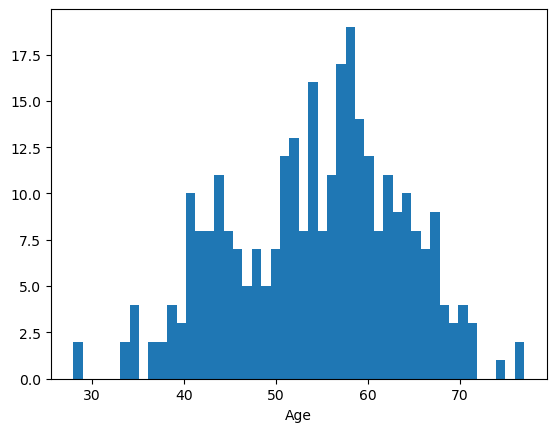

In [15]:
plt.hist(x.age, bins=48)
plt.xlabel('Age')
plt.show()
#histogram for age to visualise the distribution, bins are set to 48 because maxAge(77) - minAge(29) = 48

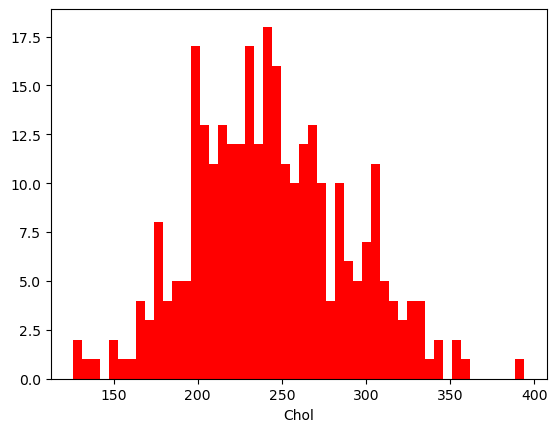

In [16]:
plt.hist(x.chol, bins=50, color='red')
plt.xlabel('Chol')
plt.show()
#histogram for chol to visualise the distribution

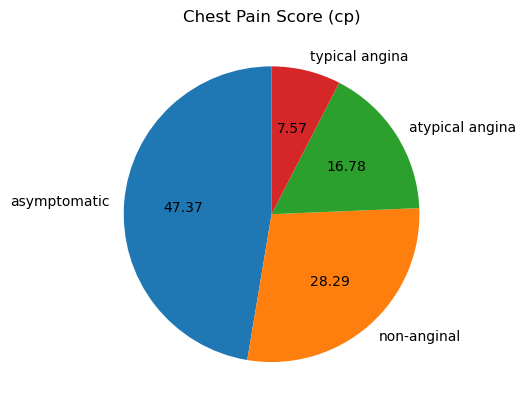

In [17]:
cp_counts = x['cp'].value_counts()
plt.figure()
plt.pie(cp_counts, labels=cp_counts.index, autopct='%.2f', startangle=90)
plt.title('Chest Pain Score (cp)')
plt.show()
#piechart of different chestpain scores and the percentage of total participants with that score

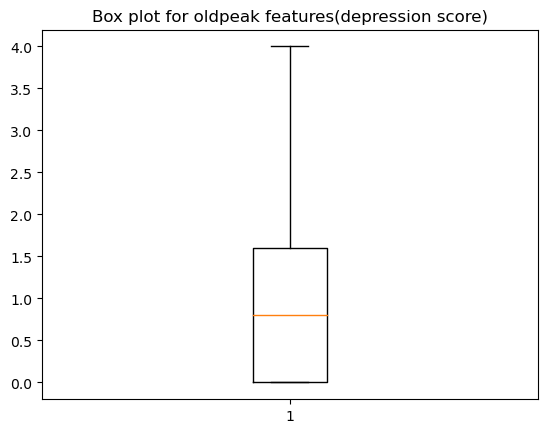

In [18]:
plt.boxplot(x.oldpeak)
plt.title('Box plot for oldpeak features(depression score)')
plt.show()
#box plot for oldpeak (depression score), we can see that the median is somewhere around 0.8

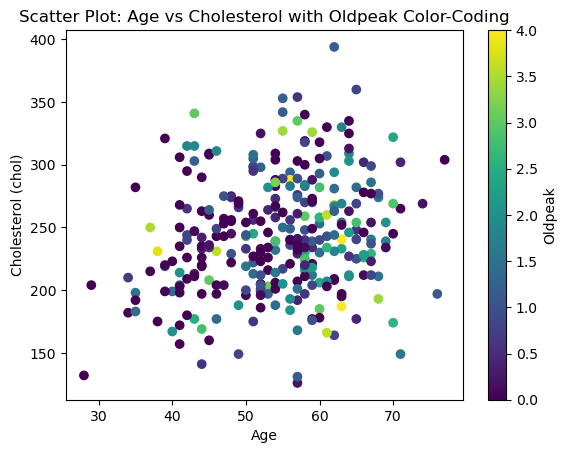

In [19]:
plt.figure()
plt.scatter(x['age'], x['chol'], c=x['oldpeak'])
plt.colorbar(label='Oldpeak')
plt.xlabel('Age')
plt.ylabel('Cholesterol (chol)')
plt.title('Scatter Plot: Age vs Cholesterol with Oldpeak Color-Coding')
plt.show()
#visualising the possible relationship between age, cholesterol and oldpeak(depression), age is on the x-axis, chol on y-axis
#and oldpeak is determined by the color of the circle/point

C:\Users\jojom\AppData\Local\Temp\ipykernel_10612\2455498420.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x_numeric = x.corr()


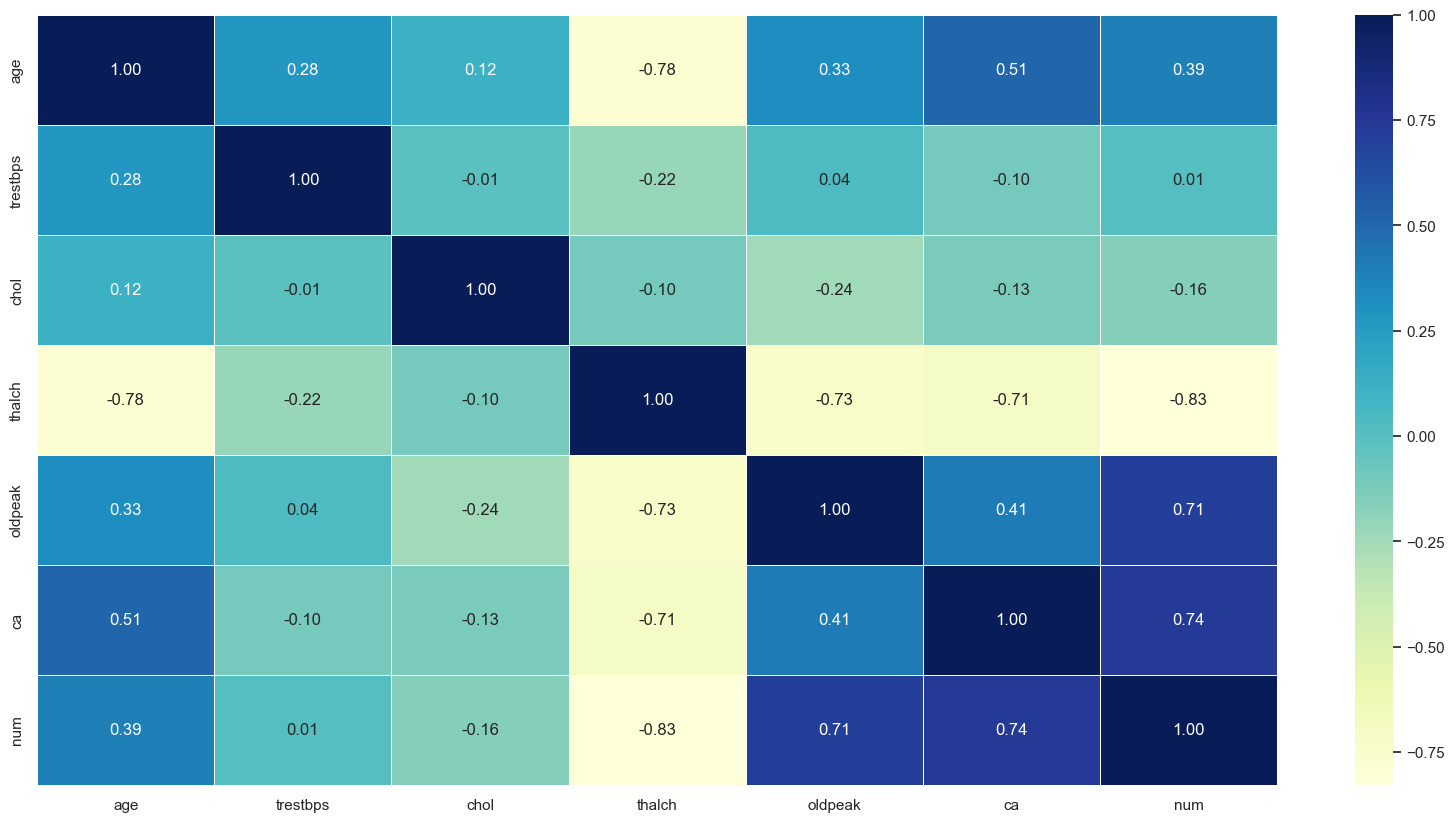

In [20]:
sns.set(rc={'figure.figsize':(20,10)})
x_numeric = x.corr()
sns.heatmap(x_numeric.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()
#before making more visualisations, it would be useful to make a heatmap of all column correlations in order to identify
#interesting relationships to visualize
#some of the relationships that would be interesting to visualize are age and trestbps (positive corr), 
#oldpeak and num (negative corr), ca and num (negative corr), thalch and num (positive corr)
#and age and num (positive corr)

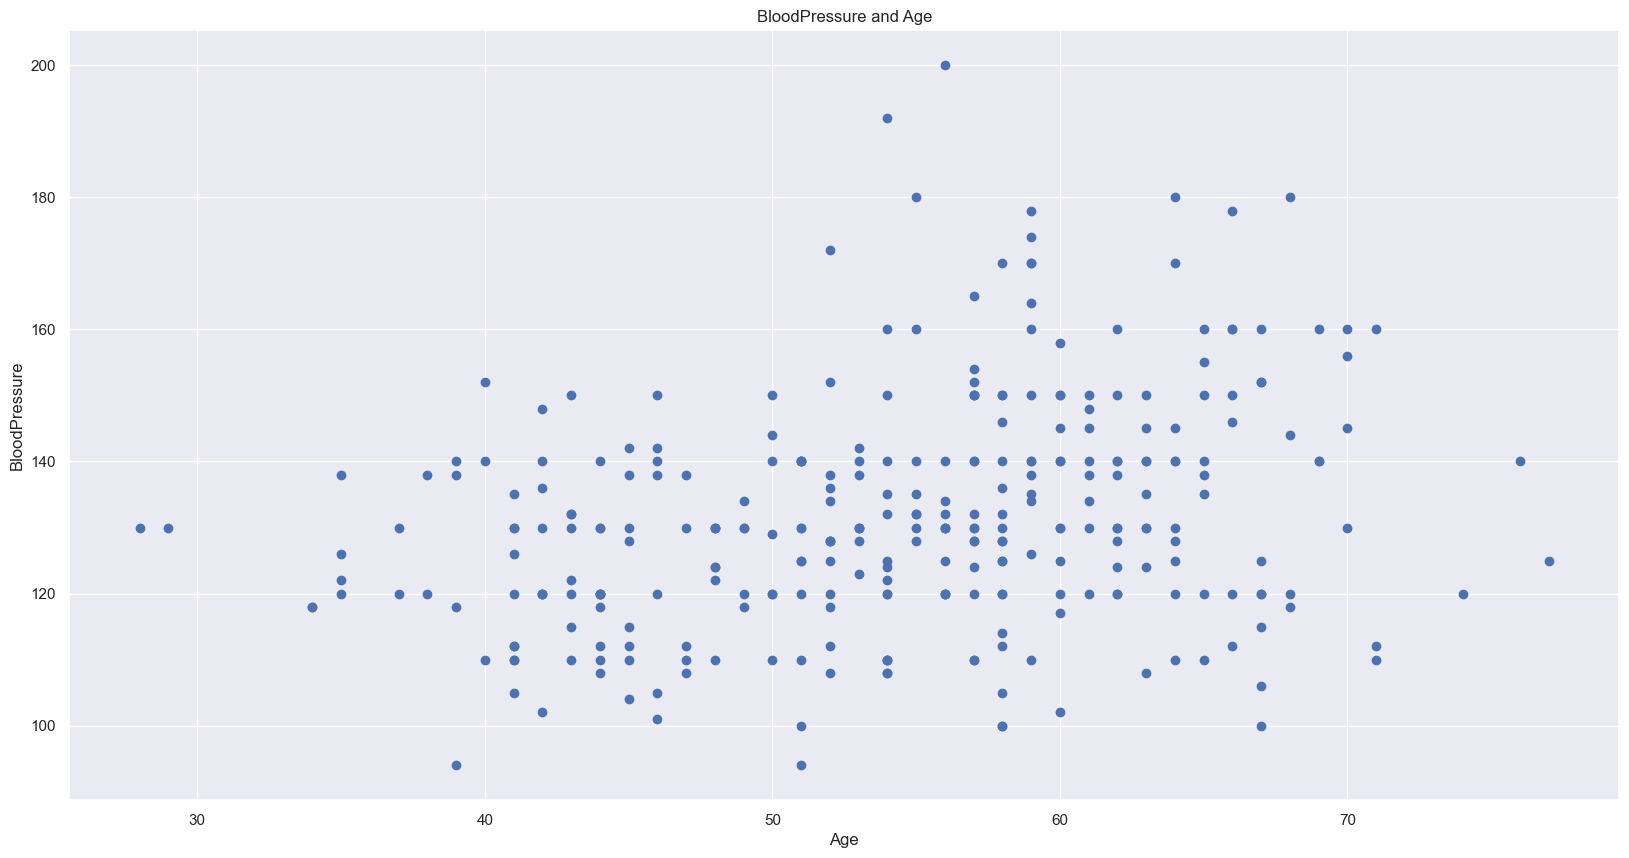

In [21]:
#visualising the relationship between age and trestbps
plt.scatter(x.age, x.trestbps)
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.title('BloodPressure and Age')
plt.show()
#from the graph it is visible that there is a positive correlation between the two variables

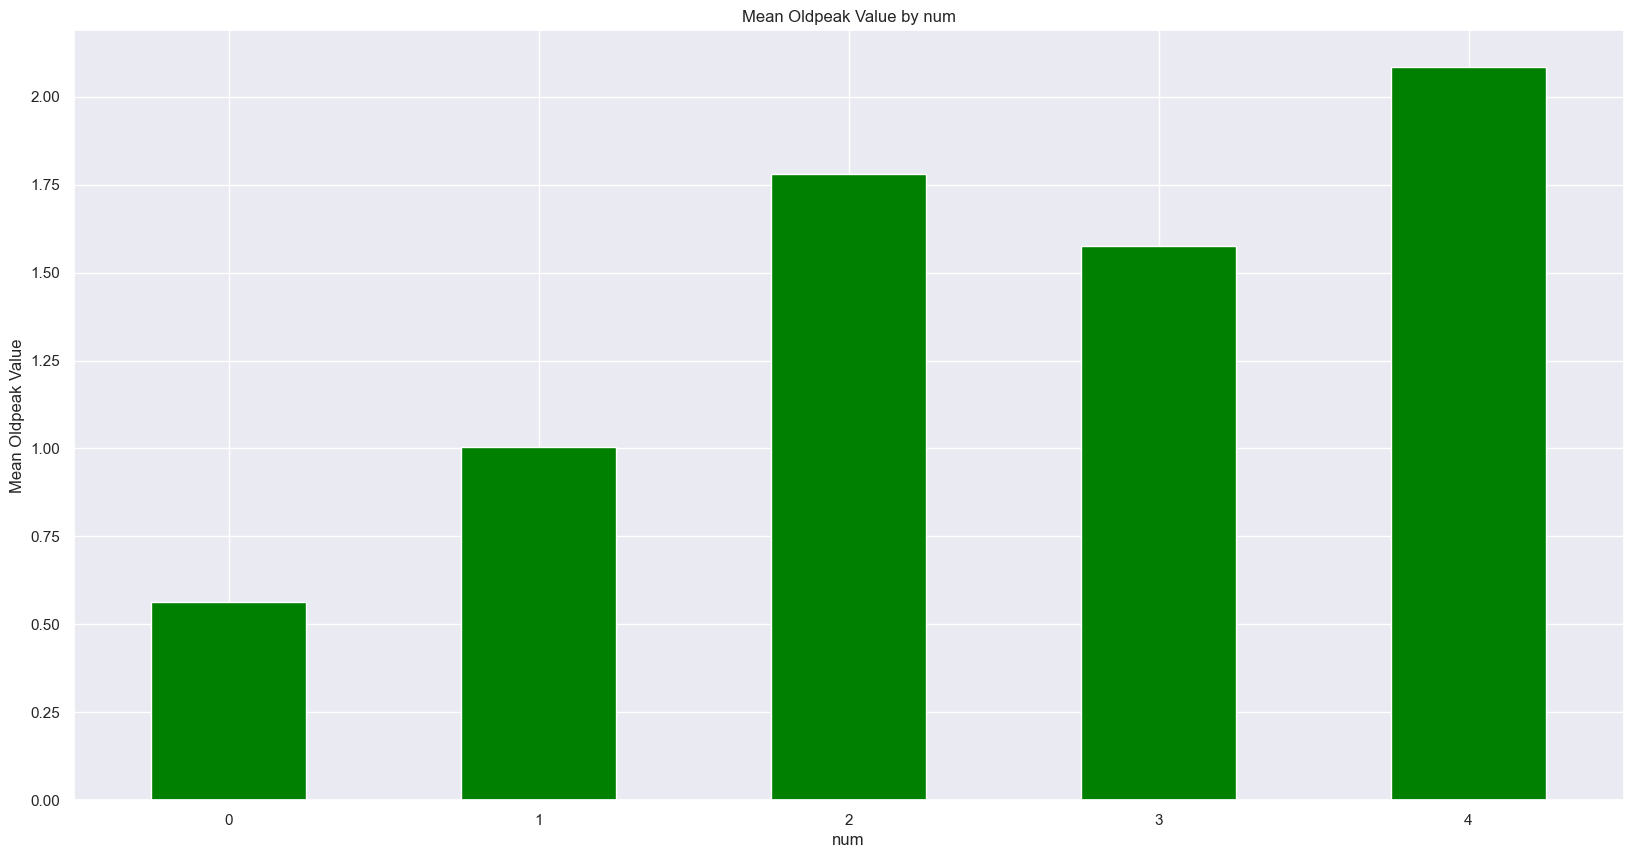

In [22]:
#visualising the relationship between mean oldpeak(depression) and num, from the graph it is visible that there is a positive 
#correlation between the two variables
plt.figure()
x.groupby('num')['oldpeak'].mean().plot(kind='bar', color='green')
plt.xlabel('num')
plt.ylabel('Mean Oldpeak Value')
plt.title('Mean Oldpeak Value by num')
plt.xticks(rotation=0)
plt.show()

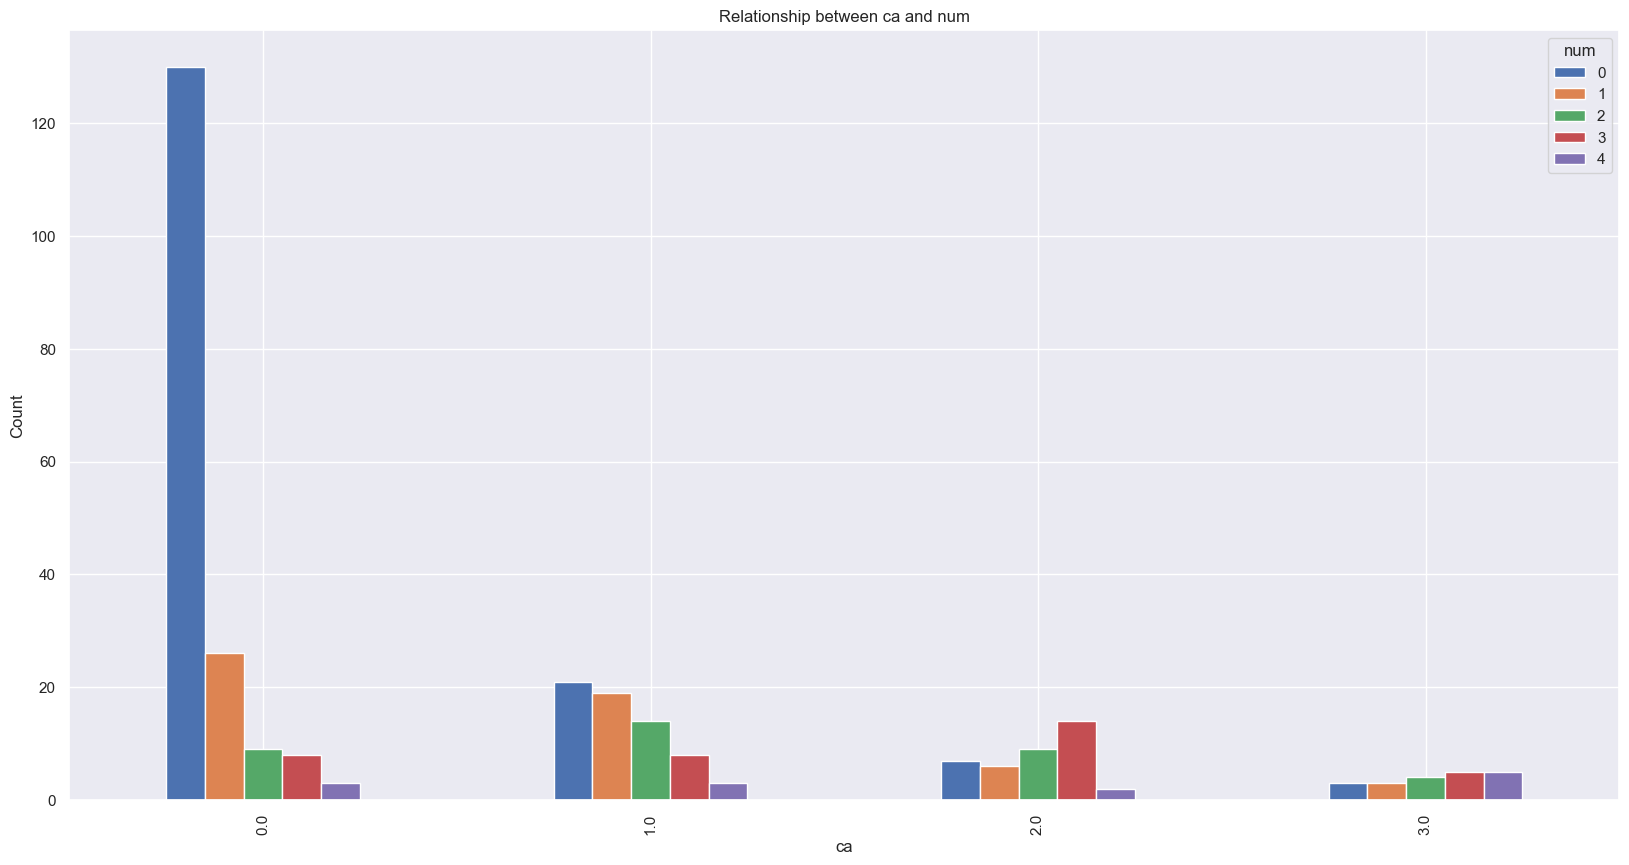

In [23]:
ct = pd.crosstab(x['ca'], x['num'])
ct.plot(kind='bar', stacked=False)
plt.title('Relationship between ca and num')
plt.xlabel('ca')
plt.ylabel('Count')
plt.legend(title='num')

plt.show()
#from this graph it is visible that for higher patients with ca, it is more likely that they will also have a high num

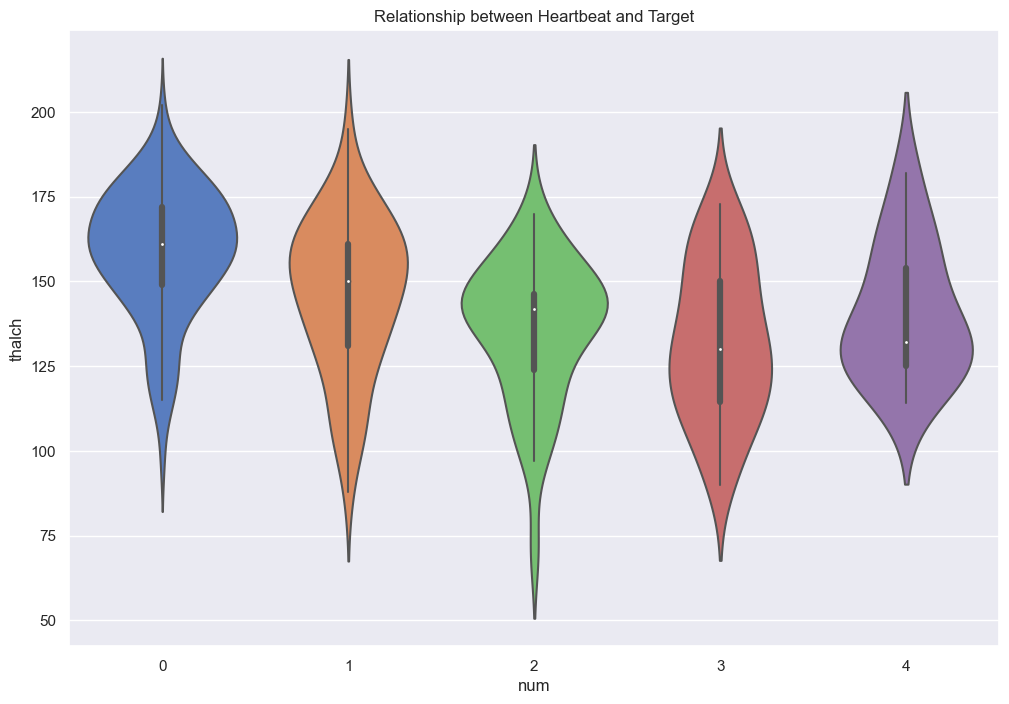

In [24]:
#visualising the relationship between thalch (heartbeat) and target, the negative correlation between the two variables is visible, when
#num is higher thalch is lower 
plt.figure(figsize=(12, 8))
sns.violinplot(x='num', y='thalch', data=x, palette='muted')
plt.xlabel('num')
plt.ylabel('thalch')
plt.title('Relationship between Heartbeat and Target')
plt.show()

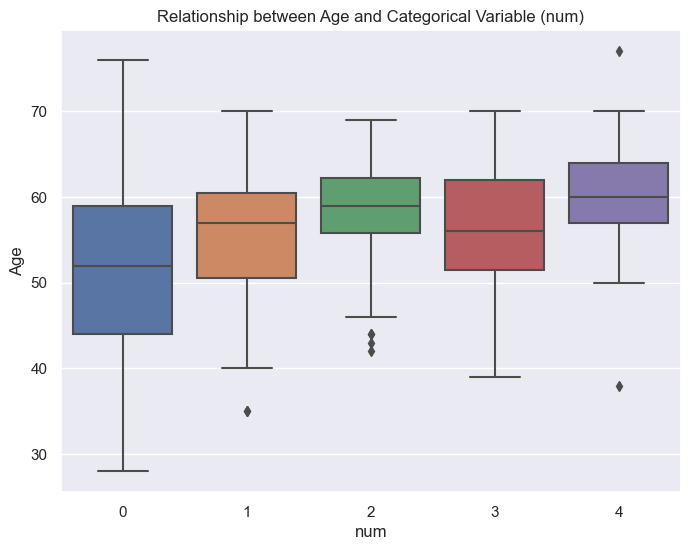

In [25]:
#visualising the relationship between age and num, the positive correlation between two variables is visible
plt.figure(figsize=(8, 6))
sns.boxplot(x='num', y='age', data=x)
plt.title('Relationship between Age and Categorical Variable (num)')
plt.xlabel('num')
plt.ylabel('Age')

plt.show()